# Importing Libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
import numpy as np
import pandas as pd

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Building LeNet Model

In [5]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        model=Sequential()
        inputShape=(height, width, depth)
        if K.image_data_format()=='channel_first':
            inputShape=(depth, height, width)

        model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))

        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model

# Importing And Encoding the labels of Image Dataset

In [7]:
data=[]
labels=[]
imagePaths=sorted(list(paths.list_images('Training')))
random.seed(24)
random.shuffle(imagePaths)

with tqdm(total = len(imagePaths)) as pbar:
    for idx, imagePath in enumerate(imagePaths):
        image=cv2.imread(imagePath)
        image=cv2.resize(image, (28,28))
        image=img_to_array(image)
        data.append(image)

        label=imagePath.split(os.path.sep)[-2]

        if label == 'glioma':
            label=0
        elif label== 'meningioma':
            label=1
        elif label=='notumor':
            label=2
        elif label=='pituitary':
            label=3
        labels.append(label)
        pbar.update(1)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_16780\3029940604.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total = len(imagePaths)) as pbar:


  0%|          | 0/5712 [00:00<?, ?it/s]

In [8]:
imagePaths[10].split()

['Training\\notumor\\Tr-no_0467.jpg']

In [9]:
imagePaths[10].split('\\')

['Training', 'notumor', 'Tr-no_0467.jpg']

In [10]:
imagePaths[10].split(os.path.sep)[-2]

'notumor'

In [11]:
data=np.array(data, dtype='float')/255.0
labels=np.array(labels)

In [12]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, random_state=0)

In [13]:
labels

array([3, 2, 0, ..., 1, 3, 2])

In [14]:
data

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.02352941, 0.02352941, 0.02352941],
         [0.03137255, 0.03137255, 0.03137255],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.03529412, 0.03529412, 0.03529412],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.02745098, 0.02745098, 0.02745098],
         [0.03529412, 0.03529412, 0.03529412],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.03529412, 0.03529412, 0.03529412]

In [15]:
labels

array([3, 2, 0, ..., 1, 3, 2])

In [16]:
y_train= to_categorical(y_train, num_classes=4)
y_test= to_categorical(y_test, num_classes=4)

In [17]:
aug = ImageDataGenerator( rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [18]:
model=LeNet.build(width=28,height=28,depth=3,classes=4)
opt=Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\Sarthak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
history = model.fit(x=aug.flow(X_train, y_train, batch_size=32),validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train)//32,
                    epochs=60,
                    verbose=1)

C:\Users\Sarthak\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.3751 - loss: 1.2524 - val_accuracy: 0.6658 - val_loss: 0.8484
Epoch 2/60
  1/142 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8438 - loss: 0.6446

C:\Users\Sarthak\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.6446 - val_accuracy: 0.6658 - val_loss: 0.8582
Epoch 3/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6349 - loss: 0.9205 - val_accuracy: 0.7883 - val_loss: 0.6111
Epoch 4/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.6794 - val_accuracy: 0.7778 - val_loss: 0.6322
Epoch 5/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6995 - loss: 0.7558 - val_accuracy: 0.7647 - val_loss: 0.6135
Epoch 6/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6250 - loss: 0.8388 - val_accuracy: 0.7235 - val_loss: 0.6905
Epoch 7/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7135 - loss: 0.7132 - val_accuracy: 0.7848 - val_loss: 0.5568
Epoch 8/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 0.8497 - val_accuracy: 0.7647 - val_loss: 0.5953
Epoch 9/60
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7187 - loss: 0.6849 - val_accuracy: 0.7629 - 

In [60]:
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 20)     │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 20)     │        10,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 20)       │        10,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │        90,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,066 (445.57 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

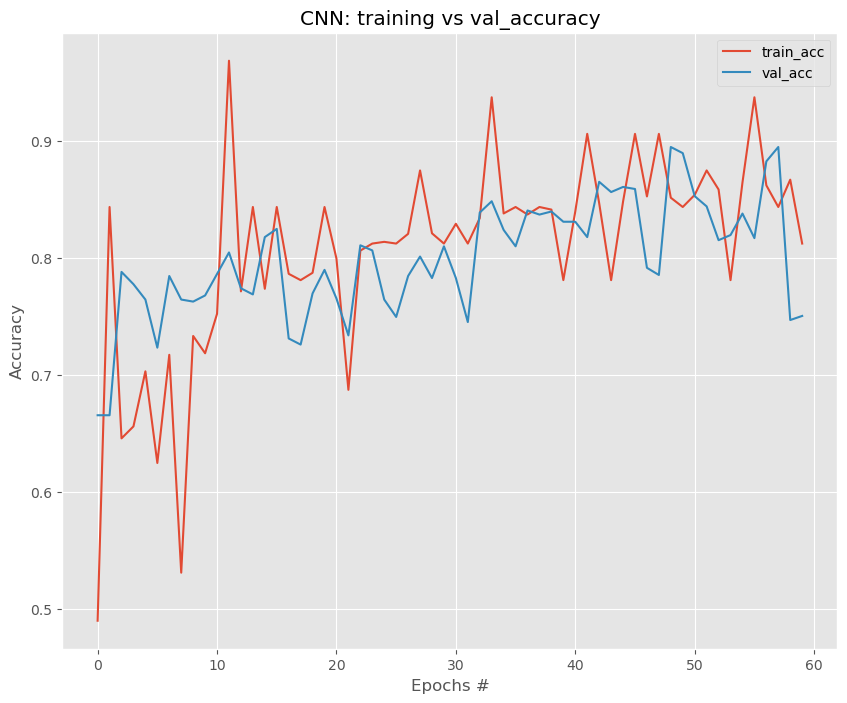

In [21]:
N=np.arange(0,60)
plt.style.use('ggplot')
plt.figure(figsize=[10,8])
plt.plot(N, history.history['accuracy'], label='train_acc')
plt.plot(N, history.history['val_accuracy'], label='val_acc')
plt.title('CNN: training vs val_accuracy')
plt.xlabel('Epochs #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()    

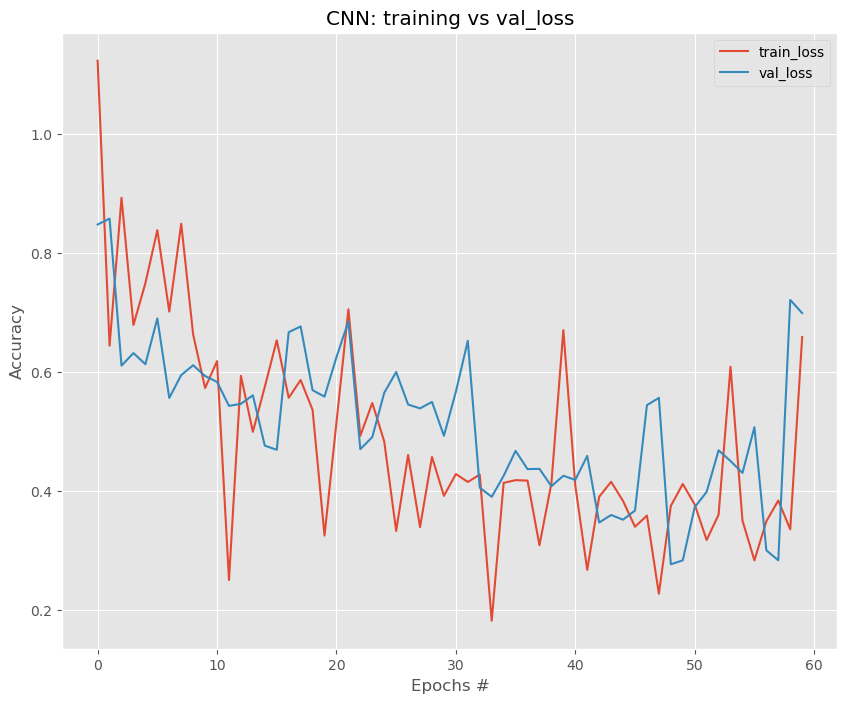

In [22]:


N=np.arange(0,60)
plt.style.use('ggplot')
plt.figure(figsize=[10,8])
plt.plot(N, history.history['loss'], label='train_loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.title('CNN: training vs val_loss')
plt.xlabel('Epochs #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()    

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.95      0.36      0.52       262
  meningioma       0.73      0.61      0.66       306
     notumor       0.62      1.00      0.77       405
   pituitary       0.92      0.81      0.86       300

    accuracy                           0.73      1273
   macro avg       0.80      0.70      0.70      1273
weighted avg       0.78      0.73      0.72      1273



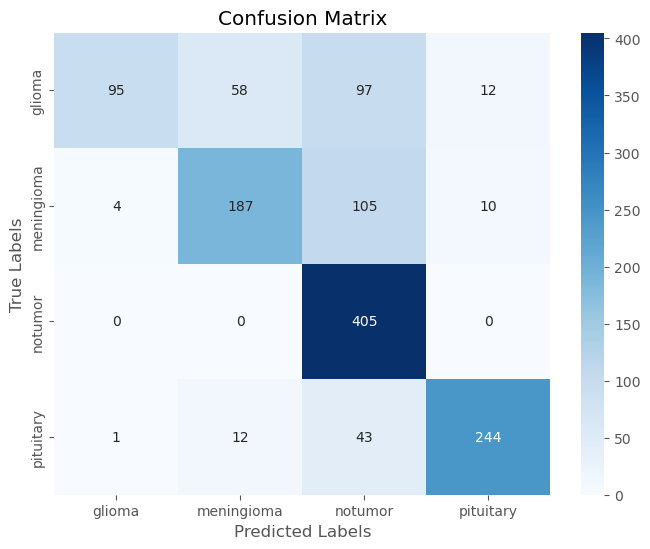

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict the probabilities
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [71]:
def prediction_image(image):
    image=cv2.resize(image, dsize=(28,28))
    image=image.astype('float')/255.0
    image=img_to_array(image)
    image=np.expand_dims(image, axis=0)

    preds=model.predict(image)[0]
    result=dict()
    result['glioms']=round(float(list(preds)[0]),3)
    result['menigioma']=round(float(list(preds)[1]),3)
    result['notumor']=round(float(list(preds)[2]),3)
    result['pituitary']=round(float(list(preds)[2]),4)

    print(result)
    return result

In [73]:
image=cv2.resize(image, dsize=(28,28))
image=image.astype('float')/255.0
image=img_to_array(image)
image=np.expand_dims(image, axis=0)

preds=model.predict(image)[0]
result=dict()
result['glioms']=round(float(list(preds)[0]),3)
result['menigioma']=round(float(list(preds)[1]),3)
result['notumor']=round(float(list(preds)[2]),3)
result['pituitary']=round(float(list(preds)[2]),4)

print(result)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3845: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'


In [ ]:
preds

In [84]:
model.save('model_lenet5.h5')

In [94]:
from tensorflow.keras.models import load_model
model = load_model('model_lenet5.h5')

In [95]:
def prediction_image(image):
    image=cv2.resize(image, dsize=(28,28))
    image=image.astype('float')/255.0
    image=img_to_array(image)
    image=np.expand_dims(image, axis=0)

    preds=model.predict(image)[0]
    result=dict()
    result['glioms']=round(float(list(preds)[0]),3)
    result['menigioma']=round(float(list(preds)[1]),3)
    result['notumor']=round(float(list(preds)[2]),3)
    result['pituitary']=round(float(list(preds)[2]),4)

    print(result)
    return result

In [96]:
import gradio as gr

In [ ]:
label=gr.Label(num_top_classes=3)
gr.Interface(fn=prediction_image, inputs=gr.Image(width=200, height=200),
             outputs=label, title='Brain TUmor Detection Using LeNet').launch(share=True)

* Running on local URL:  http://127.0.0.1:7865
* Running on public URL: https://ad5a814a03efcaf3a3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
